Ahnaf Rafli - 0706022310045

# **Data Preprocessing**

Cleaning, Handling missing values and Encoding the dataset values

### **Library Import + Dataset**

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Import the dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### **Dataset Overview**

In [3]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# Check in for missing vales
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [5]:
# Statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### **Dataset Unique values**

In [6]:
# Look for unique values
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

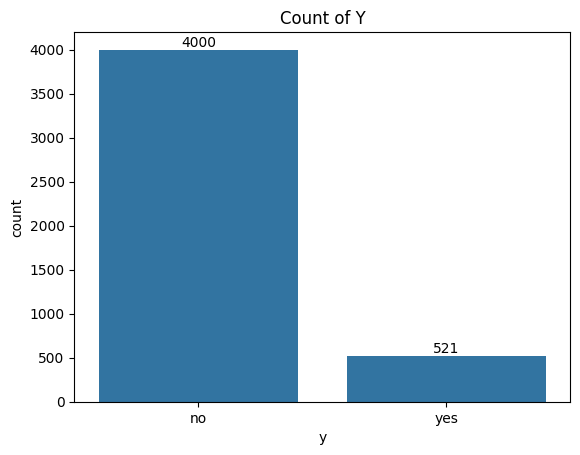

In [7]:
# Visualizing the attrition
ax = sns.countplot(data=df, x='y')
plt.title('Count of Y')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [8]:
# Note : That is a MASSIVE difference wow i am surprised but alright

### **One-Hot + Nominal Encoding**

In [9]:
# Duplicate the DF for encoding
df_encoded = df.copy()

# One-Hot Encoding
# Columns Used : Default ; Housing ; Loan
one_hot_map = {
    'y': {'no': 0, 'yes': 1},
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

In [10]:
# Nomial Encoding
# Columns Used : Contact ; Job ; Marital ; poutcome
nominal_cols = ['contact', 'job', 'marital','poutcome']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

In [11]:
# Manual Ordinal Encoding
# For Columns : Month ; Education
Month_mapping = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}
df_encoded['month'] = df_encoded['month'].map(Month_mapping)

Education_mapping = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df_encoded['education'] = df_encoded['education'].map(Education_mapping)

In [12]:
# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2850,43,2.0,1.0,3,0,1574,1,0,0.0,19,10,167,3,-1,0,3.0,0
3365,34,2.0,1.0,2,0,1847,1,0,0.0,9,3,543,3,321,6,0.0,0
4264,57,7.0,1.0,2,0,162,1,0,2.0,5,4,174,1,-1,0,3.0,0
3320,48,4.0,2.0,2,0,290,1,0,0.0,21,6,257,2,-1,0,3.0,0
2569,53,9.0,1.0,2,0,4541,1,0,2.0,15,4,190,6,-1,0,3.0,0


In [13]:
# Check if Encoding has worked with a random sample
df.loc[3501]

,3501
age,30
job,management
marital,married
education,tertiary
default,no
balance,151
housing,no
loan,no
contact,cellular
day,19


### **Target and Variable Seperation (X and y)**

In [14]:
# Drop target column on X set
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [15]:
# Check each set
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,1,0,1787,0,0,0.0,19,9,79,1,-1,0,3.0
1,33,7.0,1.0,2,0,4789,1,1,0.0,11,4,220,1,339,4,0.0
2,35,4.0,2.0,3,0,1350,1,0,0.0,16,3,185,1,330,1,0.0
3,30,4.0,1.0,3,0,1476,1,1,2.0,3,5,199,4,-1,0,3.0
4,59,1.0,1.0,2,0,0,1,0,2.0,5,4,226,1,-1,0,3.0


In [16]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [17]:
# Split Test and Train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
# Check the shape of the train and test sets
X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [19]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
565,40,9.0,1.0,2,0,56,1,1,0.0,29,0,194,1,247,1,0.0
3480,47,7.0,1.0,2,0,440,1,0,2.0,12,5,91,1,-1,0,3.0
2125,52,9.0,1.0,2,0,3554,0,1,0.0,8,6,89,1,-1,0,3.0
3452,31,0.0,1.0,2,0,0,1,0,0.0,29,6,82,5,-1,0,3.0
1667,33,1.0,1.0,2,0,-346,1,1,2.0,23,4,29,3,-1,0,3.0


In [20]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,1,0,378,1,0,2.0,16,4,427,3,-1,0,3.0
72,31,4.0,2.0,3,0,6248,1,0,2.0,9,4,154,2,-1,0,3.0
1065,30,10.0,1.0,3,0,0,1,0,0.0,18,10,756,1,-1,0,3.0
3185,42,0.0,1.0,2,0,529,1,1,0.0,19,10,193,3,-1,0,3.0
130,41,1.0,1.0,1,0,168,1,0,0.0,18,10,187,3,-1,0,3.0


# **Model Development**

Decision Tree, Random Forest, and XGBoost Classification Models

### **(Un-oversampled) Decision Tree Classifier**

In [21]:
# Initializing the Decision Tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

# Print Classification Reports on both sets
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1190
           1       0.41      0.44      0.42       167

    accuracy                           0.85      1357
   macro avg       0.66      0.68      0.67      1357
weighted avg       0.86      0.85      0.85      1357



### **(Un-oversampled) Random Forest Classifier**

In [22]:
# Intializing the Random Forset Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Print Classification Reports on both sets
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.60      0.30      0.40       167

    accuracy                           0.89      1357
   macro avg       0.75      0.64      0.67      1357
weighted avg       0.87      0.89      0.87      1357



### **(Un-oversampled) XGBoost Classifier**

In [23]:
# Intialize XGBoost
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Print Classification Reports on both sets
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1190
           1       0.61      0.41      0.49       167

    accuracy                           0.89      1357
   macro avg       0.76      0.69      0.72      1357
weighted avg       0.88      0.89      0.89      1357



### From the Results of the first Classifications (Un-oversampled)  :
---


*   We can see that all three models are overfitting the training data, hence the state of perfect scores on the Training Data but drops down significantly on the Test data.

*  We can remedy this by using SMOTE-NC to Oversample and make the datasets even.

* We'll split the existing training dataset and the oversampled / refitted dataset to make the comparison easier.


### **Oversampling using SMOTE-NC**

In [24]:
# Using SMOTE-NC for datasets that contains numerical and categorical Values
# Defining it first will make oversampling much more accurate

categorical_features = [
    'job',
    'marital',
    'education',
    'contact',
    'month',
    'poutcome'
]

# Get the indices of the categorical features based on the original X DataFrame structure
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# The resampling will be done on the training data after splitting

In [25]:
# Split the dataset into Training set and Testing set before oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTE-NC ONLY to the training data
X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train, y_train)

# Check the shape of the original and resampled training data
print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)

# Check the class distribution in the original and resampled training data
print("\nClass distribution in original training data:")
print(y_train.value_counts())
print("\nClass distribution in resampled training data:")
print(y_train_resampled.value_counts())

Shape of original training data: (3164, 16)
Shape of resampled training data: (5620, 16)

Class distribution in original training data:
y
0    2810
1     354
Name: count, dtype: int64

Class distribution in resampled training data:
y
0    2810
1    2810
Name: count, dtype: int64


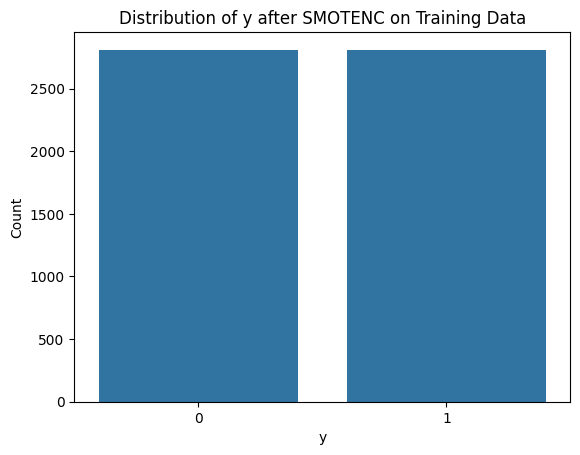

In [26]:
# Additional Visualization after Oversampling the target class
sns.countplot(x = y_train_resampled )
plt.title('Distribution of y after SMOTENC on Training Data')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

### **Decision Tree Classification w/ No parameters**

In [27]:
# Initializing the Decision Tree
tree_untuned_resampled_new = DecisionTreeClassifier(random_state=0)
tree_untuned_resampled_new.fit(X_train_resampled, y_train_resampled)

y_pred_train_resampled_new = tree_untuned_resampled_new.predict(X_train_resampled)
y_pred_test_untuned_resampled_new = tree_untuned_resampled_new.predict(X_test)

# Print Classification Reports on both sets
print("\n=== Classification Report (Resampled Training Set ) ===")
print(classification_report(y_train_resampled, y_pred_train_resampled_new))

print("\n=== Classification Report (Original Test Set) ===")
print(classification_report(y_test, y_pred_test_untuned_resampled_new))


=== Classification Report (Resampled Training Set ) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00      2810

    accuracy                           1.00      5620
   macro avg       1.00      1.00      1.00      5620
weighted avg       1.00      1.00      1.00      5620


=== Classification Report (Original Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1190
           1       0.43      0.53      0.47       167

    accuracy                           0.85      1357
   macro avg       0.68      0.71      0.69      1357
weighted avg       0.87      0.85      0.86      1357



### **Random Forest Classifier w/ No parameters**

In [28]:
# Initializing the Random Forest Classifier
rf_untuned_resampled_new = RandomForestClassifier(random_state=0)
rf_untuned_resampled_new.fit(X_train_resampled, y_train_resampled)

y_pred_train_resampled_rf_new = rf_untuned_resampled_new.predict(X_train_resampled)
y_pred_test_untuned_resampled_rf_new = rf_untuned_resampled_new.predict(X_test)

# Print Classification Reports on both sets
print("\n=== Classification Report (Resampled Training Set ) ===")
print(classification_report(y_train_resampled, y_pred_train_resampled_rf_new))

print("\n=== Classification Report (Original Test Set) ===")
print(classification_report(y_test, y_pred_test_untuned_resampled_rf_new))


=== Classification Report (Resampled Training Set ) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00      2810

    accuracy                           1.00      5620
   macro avg       1.00      1.00      1.00      5620
weighted avg       1.00      1.00      1.00      5620


=== Classification Report (Original Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1190
           1       0.48      0.53      0.50       167

    accuracy                           0.87      1357
   macro avg       0.71      0.72      0.71      1357
weighted avg       0.88      0.87      0.87      1357



### **XGBoost w/No Parameters**

In [29]:
# Initialize the XGBoost Classifier
xgb_untuned_resampled_new = XGBClassifier(random_state=0)
xgb_untuned_resampled_new.fit(X_train_resampled, y_train_resampled)

y_pred_train_resampled_xgb_new = xgb_untuned_resampled_new.predict(X_train_resampled)
y_pred_test_untuned_resampled_xgb_new = xgb_untuned_resampled_new.predict(X_test)

# Print Classification Reports on both sets
print("\n=== Classification Report (Resampled Training Set) ===")
print(classification_report(y_train_resampled, y_pred_train_resampled_xgb_new))

print("\n=== Classification Report (Original Test Set) ===")
print(classification_report(y_test, y_pred_test_untuned_resampled_xgb_new))


=== Classification Report (Resampled Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00      2810

    accuracy                           1.00      5620
   macro avg       1.00      1.00      1.00      5620
weighted avg       1.00      1.00      1.00      5620


=== Classification Report (Original Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1190
           1       0.55      0.57      0.56       167

    accuracy                           0.89      1357
   macro avg       0.75      0.76      0.75      1357
weighted avg       0.89      0.89      0.89      1357



## **Hyperparameter Tuning using GridsearchCV**

### **Decision Tree Hyperparameter**

In [30]:
# Using GridSearchCV
# Defining the parameter grid to tune in the Hyperparameters

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0]
}

In [31]:
# Initialize a decision tree classifier
dtree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train_resampled, y_train_resampled)

# Getting the best estimator from the current GridSearch
best_dtree_clf = grid_search.best_estimator_
y_pred_test = best_dtree_clf.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
print("Best current parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Best current parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}
Best cross-validation f1 score: 0.875


### **Random Forest Hyperparameter**

In [33]:
# Define the parameter grid for Random Forest

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [0]
}

In [34]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=0)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest model
best_rf = grid_search_rf.best_estimator_

In [35]:
print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation F1-score for Random Forest: {:.3f}".format(grid_search_rf.best_score_))


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 0}
Best cross-validation F1-score for Random Forest: 0.926


### **XGBoost Hyperparameter**

In [36]:
# Define a further parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'random_state': [0],
    'use_label_encoder': [False],
    'eval_metric': ['logloss']

}

In [37]:
# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=0)

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)

grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get the best XGBoost model
best_xgb = grid_search_xgb.best_estimator_

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:49:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:
print("\nBest parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best cross-validation F1-score for XGBoost: {:.3f}".format(grid_search_xgb.best_score_))


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'random_state': 0, 'subsample': 0.8, 'use_label_encoder': False}
Best cross-validation F1-score for XGBoost: 0.927


# **Model Evaluation**

Evaluation of each model accuracy score both before and after tuned.



## **Evaluation of Tuned Models on Test Data**

=== Classification Report (Tuned Decision Tree on Test Set) ===
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1190
           1       0.43      0.66      0.52       167

    accuracy                           0.85      1357
   macro avg       0.69      0.77      0.72      1357
weighted avg       0.89      0.85      0.86      1357



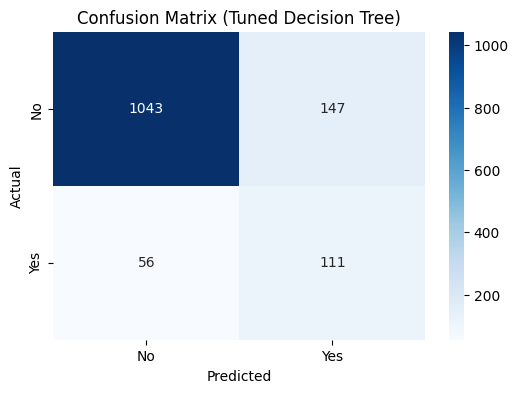

In [39]:
# Evaluate Tuned Decision Tree
print("=== Classification Report (Tuned Decision Tree on Test Set) ===")
y_pred_test_tuned_tree = best_dtree_clf.predict(X_test) # Corrected variable name
print(classification_report(y_test, y_pred_test_tuned_tree))

# Confusion Matrix for Tuned Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_test_tuned_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Decision Tree)')
plt.show()


=== Classification Report (Tuned Random Forest on Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1190
           1       0.49      0.54      0.51       167

    accuracy                           0.87      1357
   macro avg       0.71      0.73      0.72      1357
weighted avg       0.88      0.87      0.88      1357



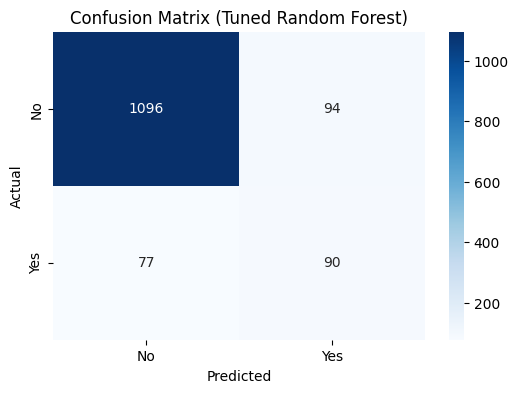

In [40]:
# Evaluate Tuned Random Forest
print("\n=== Classification Report (Tuned Random Forest on Test Set) ===")
y_pred_test_tuned_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_test_tuned_rf))

# Confusion Matrix for Tuned Random Forest
cm_rf = confusion_matrix(y_test, y_pred_test_tuned_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()


=== Classification Report (Tuned XGBoost on Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1190
           1       0.54      0.61      0.57       167

    accuracy                           0.89      1357
   macro avg       0.74      0.77      0.76      1357
weighted avg       0.89      0.89      0.89      1357



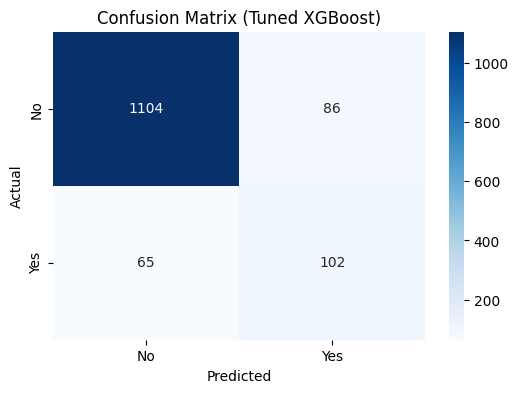

In [41]:
# Evaluate Tuned XGBoost
print("\n=== Classification Report (Tuned XGBoost on Test Set) ===")
y_pred_test_tuned_xgb = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test_tuned_xgb))

# Confusion Matrix for Tuned XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_test_tuned_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned XGBoost)')
plt.show()

**Conclusion of Model Evaluation**

Based on the evaluation of the tuned models on the test set, particularly focusing on the metrics for the minority class (clients who subscribed to a term deposit), the **Tuned XGBoost Classifier performed best**.

Key findings:
*   **XGBoost** achieved the highest F1-score (0.57) for class 1, indicating the best balance between precision and recall in identifying subscribers. It also had the highest precision (0.54) and a strong recall (0.61).
*   **Decision Tree** had the highest recall (0.66) but lower precision (0.43), meaning it identified more potential subscribers but also had more false positives.
*   **Random Forest** showed improved performance over the untuned version but had a slightly lower F1-score (0.51) and recall (0.54) for class 1 compared to XGBoost.

The confusion matrices visually support these results, showing that the tuned XGBoost model was most effective at correctly identifying true positives for the minority class while managing false positives and negatives.

Although it is noted that the XGBoost Tuned model is significantly Shorten, due to time constratints and resources, we had to shorten it's classification because if it had a full sweep with the Gridsearch, the runtime will take on hours.

So it's best that this classification is still within testing parameters, not too be taken accurately.

We will revamp the matrixes and models but for now, this is our results.

# **Discussions and Insights**

What, why, and how these models hold up to testing and training.

Based on the analysis and evaluation of the models:

1.  **Which model performed best overall?**
    * The **Tuned XGBoost Classifier** performed best overall, achieving the highest F1-score (0.57) for the minority class (clients who subscribed to a term deposit) on the test set. This indicates a better balance between precision and recall in identifying potential subscribers compared to the other models.

2.  **Did ensemble methods (RF, XGBoost) improve performance compared to a single Decision Tree?**
    - Yes, both ensemble methods, Random Forest and XGBoost, demonstrated improved performance over the single Decision Tree, particularly after handling class imbalance and hyperparameter tuning. The F1-scores for the minority class were higher for the tuned ensemble models (Random Forest: 0.51, XGBoost: 0.57) compared to the untuned Decision Tree on original data (0.42) and the tuned Decision Tree (0.52). This highlights the effectiveness of ensemble techniques in boosting predictive power and robustness.

3.  **How could the bank use these insights to refine its marketing strategy?**
    *   **Targeted Marketing:** Use the model to identify clients most likely to subscribe, focusing resources for higher conversion rates.
    *   **Personalization:** Understand key features influencing subscription (e.g., job, balance, previous interactions) to tailor marketing messages and offers.
    *   **Timing and Channel Optimization:** Utilize insights from contact-related features to determine the best time and method for outreach.
    *   **Resource Allocation:** Allocate marketing budget more effectively by prioritizing high-potential customer segments identified by the model.
    *   **Performance Monitoring:** Continuously evaluate the model's predictions against actual outcomes to refine future campaigns and model updates.